In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
dataset = pd.read_csv('bodyfat.csv')
#print('\n')
#print('DATA INFO')
#print(dataset.info())

#print('\n')
#print('DATA HEAD')
#print(dataset.head())

#print('\n')
#print('DATA DESCRIPTION')
#print(dataset.describe())

#print('\n')
#print('MISSING DATA')
#print(dataset.isnull().sum())


#dataset.hist(figsize=(10, 11))
#plt.show()

#defining features and targets of data
feature_columns = ['Age', 'Weight', 'Height', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Biceps']
target_column_one = ['Density']
target_column_two = ['BodyFat']

#split data into features and targets
X = dataset[feature_columns]
y = dataset[target_column_one]
z = dataset[target_column_two]


In [ ]:

#split data into training and test sets
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = RandomForestRegressor(random_state = 42)

#Scale feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#FOR DIRECT CALCULATION FOR BODY DENSITY BEST VALUES
param_grid = {'n_estimators': [100, 200],
              'max_depth': [10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'max_features': [0.5, 'sqrt', 'log2']
              }

random_search = RandomizedSearchCV(estimator = model,
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs = -1,
                                   verbose =2,
                                   random_state=42)

random_search.fit(X_train_scaled, y_train)
best_params = random_search.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
#FOR DIRECT CALCULATION FOR BODY FAT PERCENTAGE BEST VALUES
param_grid = {'n_estimators': [100, 200],
              'max_depth': [10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'max_features': [0.5, 'sqrt', 'log2']
              }

random_search = RandomizedSearchCV(estimator = model,
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs = -1,
                                   verbose =2,
                                   random_state=42)

random_search.fit(X_train_scaled, z_train)
best_params = random_search.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
param_grid = {'n_estimators': [100, 200],
              'max_depth': [10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'max_features': [0.5, 'sqrt', 'log2']
              }
grid_search = GridSearchCV(estimator=model, param_grid= param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_scaled, y_train, z_train)

best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

In [ ]:
# Train the model with best paramters found BODY DENSITY
model = RandomForestRegressor(n_estimators = best_params['n_estimators'],
                              max_depth = best_params['max_depth'],
                              min_samples_split= best_params['min_samples_split'],
                              min_samples_leaf= best_params['min_samples_leaf'],
                              max_features = best_params['max_features'],
                              random_state=42
                              )

# Train the model on the training data
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [ ]:
# Train the model with best paramters found BODY FAT PERCENTAGE
model = RandomForestRegressor(n_estimators = best_params['n_estimators'],
                              max_depth = best_params['max_depth'],
                              min_samples_split= best_params['min_samples_split'],
                              min_samples_leaf= best_params['min_samples_leaf'],
                              max_features = best_params['max_features'],
                              random_state=42
                              )

# Train the model on the training data
model.fit(X_train_scaled, z_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_split=5,
                      random_state=42)

In [ ]:
#inside braket right numbers for the X features (array) to find the body density
pred_density = model.predict(X_test_scaled)
print(f'Predicted density: {pred_density}')
#Evaluate the model
mse_d = mean_squared_error(y_test, pred_density)
mae_d= mean_absolute_error(y_test, pred_density)
r2_d = r2_score(y_test, pred_density)
print(f'Mean Squared Error for Body Density: {mse_d}')
print(f'Mean Absolute Error for Body Density: {mae_d}')
print(f'R^2 Score for Body Density: {r2_d}')

Predicted density: [1.05259358 1.06203593 1.03576269 1.05899901 1.0644443  1.06139884
 1.05012427 1.04410545 1.06891524 1.06574004 1.03814888 1.04217942
 1.05342198 1.05290671 1.07174019 1.07696957 1.06425796 1.04426249
 1.04999449 1.07132814 1.05070393 1.04925965 1.05844179 1.06793427
 1.04394882 1.03397552 1.03810901 1.0604116  1.07268967 1.04942917
 1.05287991 1.05936751 1.05001412 1.04449136 1.04540605 1.07078428
 1.05056089 1.05938974 1.04853841 1.07278471 1.06667621 1.04454879
 1.03661476 1.07460109 1.07357172 1.04950227 1.04941186 1.07211007
 1.05043038 1.07734821 1.02302507]
Mean Squared Error for Body Density: 8.71243929330557e-05
Mean Absolute Error for Body Density: 0.007396613067753302
R^2 Score for Body Density: 0.6318016626730352


In [ ]:
#inside braket right numbers for the X features (array) to find the BODY FAT DIRECTLY
pred_fat = model.predict(X_test_scaled)
print(f'Predicted density: {pred_fat}')
#Evaluate the model
mse_d = mean_squared_error(y_test, pred_fat)
mae_d= mean_absolute_error(y_test, pred_fat)
r2_d = r2_score(y_test, pred_fat)
print(f'Mean Squared Error for Body Fat: {mse_d}')
print(f'Mean Absolute Error for Body Fat {mae_d}')
print(f'R^2 Score for Body Fat: {r2_d}')

Predicted density: [20.48891348 16.21856109 28.4778119  17.45518354 14.73958812 16.72678291
 20.88023364 24.52880586 12.50914388 14.47955388 27.66891032 25.24040524
 19.89774307 20.71585276 12.0542619   9.05240595 15.72188423 23.94707411
 22.68771518 11.79163491 21.41551151 21.59497294 18.15919805 13.44102937
 23.65569585 29.40109563 27.19520992 16.67261667 11.784825   22.02906962
 20.35888268 17.79754118 21.75376482 22.54526742 23.78062811 11.85282778
 21.87134458 18.03399615 22.37206097 11.96179661 14.48994333 23.92890553
 28.485975   10.30442198 10.98265921 21.80673387 21.97434762 12.07605428
 20.98709493  8.96019293 33.89565137]
Mean Squared Error for Body Fat: 364.30904139119286
Mean Absolute Error for Body Fat 18.174507467847096
R^2 Score for Body Fat: -1539613.553371821


In [ ]:
#rounded_density = np.round(pred_density,2)
pred_body_fat = (495/pred_density)-450
#Evaluate Model for Body Fat
mse_f = mean_squared_error(z_test, pred_body_fat)
mae_f = mean_absolute_error(z_test, pred_body_fat)
r2_f = r2_score(z_test, pred_body_fat)
print(f'Mean Squared Error for Body Fat: {mse_f}')
print(f'Mean Absolute Error for Body Fat: {mae_f}')
print(f'R^2 Score for Body Fat: {r2_f}')
#print(f'Rounded body density: {rounded_density}')
print(f'Based on the predicted body density, our predicted body fat percentage is: {pred_body_fat}')


Mean Squared Error for Body Fat: 16.931869628100717
Mean Absolute Error for Body Fat: 3.2739535065882603
R^2 Score for Body Fat: 0.6360152164976633
Based on the predicted body density, our predicted body fat percentage is: [20.26697809 16.08592552 27.90869945 17.42253365 15.03137836 16.36568725
 21.37278281 24.0900447  13.08629674 14.46598875 26.81022335 24.96619949
 19.89716141 20.12711906 11.86566909  9.62301455 15.11280162 24.01875046
 21.43104504 12.04331055 21.1127324  21.76120663 17.66860721 13.51167431
 24.16117562 28.73473785 26.82853601 16.79987344 11.45685341 21.68500242
 20.13908704 17.25994173 21.42223095 23.91488151 23.50022474 12.2779849
 21.17687674 17.2501357  22.08571151 11.41597201 14.05834634 23.88882561
 27.51587281 10.63604936 11.07772035 21.65214628 21.69278063 11.70632539
 21.23542062  9.46147674 33.85910776]


y_test: [1.0549 1.0549 1.0355 1.0521 1.0607 1.0713 1.0462 1.0563 1.0722 1.0716
 1.0396 1.0433 1.065  1.0477 1.0847 1.0873 1.0488 1.0512 1.0524 1.0668
 1.0648 1.061  1.0671 1.0674 1.0502 1.0304 1.0453 1.0646 1.083  1.069
 1.0422 1.077  1.0587 1.0568 1.0561 1.0911 1.05   1.0622 1.061  1.0725
 1.0673 1.0452 1.0287 1.0775 1.067  1.0477 1.0333 1.0499 1.0459 1.0763
 1.0202]
pred_density: [1.05259358 1.06203593 1.03576269 1.05899901 1.0644443  1.06139884
 1.05012427 1.04410545 1.06891524 1.06574004 1.03814888 1.04217942
 1.05342198 1.05290671 1.07174019 1.07696957 1.06425796 1.04426249
 1.04999449 1.07132814 1.05070393 1.04925965 1.05844179 1.06793427
 1.04394882 1.03397552 1.03810901 1.0604116  1.07268967 1.04942917
 1.05287991 1.05936751 1.05001412 1.04449136 1.04540605 1.07078428
 1.05056089 1.05938974 1.04853841 1.07278471 1.06667621 1.04454879
 1.03661476 1.07460109 1.07357172 1.04950227 1.04941186 1.07211007
 1.05043038 1.07734821 1.02302507]
Length of y_test_array: 51
Length of pred_de

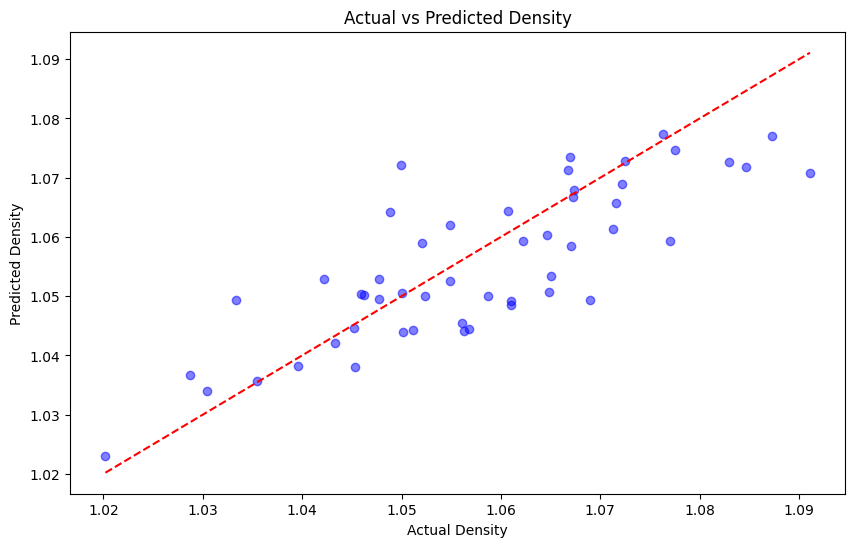

In [ ]:
y_test_array = y_test.values.flatten()
print("y_test:", y_test_array)
print("pred_density:", pred_density)

# Check if the lengths of y_test_array and pred_density match
print("Length of y_test_array:", len(y_test_array))
print("Length of pred_density:", len(pred_density))

#compare predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_array, pred_density, color='blue', alpha=0.5)
plt.plot([min(y_test_array), max(y_test_array)], [min(y_test_array), max(y_test_array)], color='red', linestyle='--')
plt.xlabel('Actual Density')
plt.ylabel('Predicted Density')
plt.title('Actual vs Predicted Density')
plt.show()



z_test: [19.2 19.2 28.  20.5 16.7 12.1 23.6 18.6 11.7 11.9 26.1 24.5 14.8 22.5
  6.3  5.3 22.  20.9 20.4 14.  14.9 16.5 13.9 13.8 21.3 30.4 23.6 15.
  7.1 13.  24.9  9.6 17.5 18.4 18.7  3.7 21.4 16.  16.6 11.5 13.8 23.6
 31.2  9.4 13.9 22.5 29.  21.5 23.3  9.9 35.2]
pred_body_fat: [20.26697809 16.08592552 27.90869945 17.42253365 15.03137836 16.36568725
 21.37278281 24.0900447  13.08629674 14.46598875 26.81022335 24.96619949
 19.89716141 20.12711906 11.86566909  9.62301455 15.11280162 24.01875046
 21.43104504 12.04331055 21.1127324  21.76120663 17.66860721 13.51167431
 24.16117562 28.73473785 26.82853601 16.79987344 11.45685341 21.68500242
 20.13908704 17.25994173 21.42223095 23.91488151 23.50022474 12.2779849
 21.17687674 17.2501357  22.08571151 11.41597201 14.05834634 23.88882561
 27.51587281 10.63604936 11.07772035 21.65214628 21.69278063 11.70632539
 21.23542062  9.46147674 33.85910776]
Length of y_test_array: 51
Length of pred_density: 51


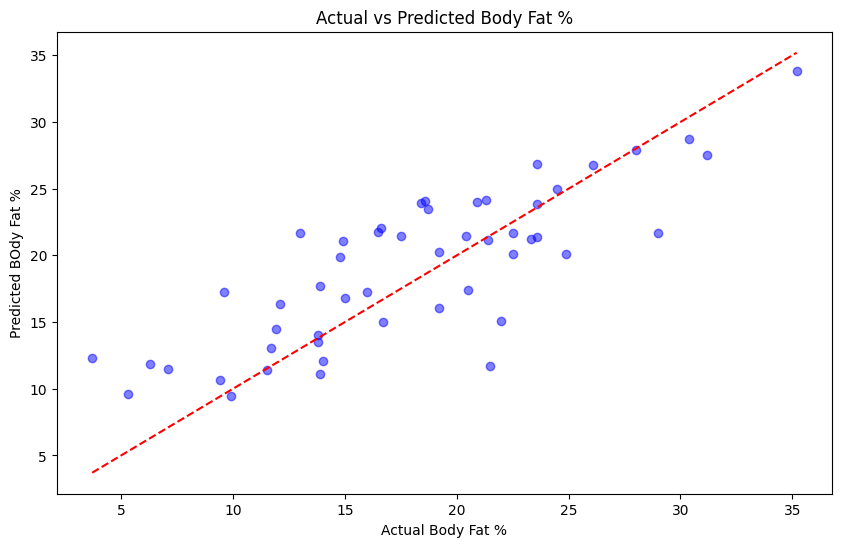

In [ ]:
z_test_array = z_test.values.flatten()
print("z_test:", z_test_array)
print("pred_body_fat:", pred_body_fat)

# Check if the lengths of y_test_array and pred_density match
print("Length of y_test_array:", len(z_test_array))
print("Length of pred_density:", len(pred_body_fat))

#compare predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(z_test_array, pred_body_fat, color='blue', alpha=0.5)
plt.plot([min(z_test_array), max(z_test_array)], [min(z_test_array), max(z_test_array)], color='red', linestyle='--')
plt.xlabel('Actual Body Fat %')
plt.ylabel('Predicted BOdy Fat %')
plt.title('Actual vs Predicted Body Fat %')
plt.show()

z_test: [19.2 19.2 28.  20.5 16.7 12.1 23.6 18.6 11.7 11.9 26.1 24.5 14.8 22.5
  6.3  5.3 22.  20.9 20.4 14.  14.9 16.5 13.9 13.8 21.3 30.4 23.6 15.
  7.1 13.  24.9  9.6 17.5 18.4 18.7  3.7 21.4 16.  16.6 11.5 13.8 23.6
 31.2  9.4 13.9 22.5 29.  21.5 23.3  9.9 35.2]
pred_fat: [20.48891348 16.21856109 28.4778119  17.45518354 14.73958812 16.72678291
 20.88023364 24.52880586 12.50914388 14.47955388 27.66891032 25.24040524
 19.89774307 20.71585276 12.0542619   9.05240595 15.72188423 23.94707411
 22.68771518 11.79163491 21.41551151 21.59497294 18.15919805 13.44102937
 23.65569585 29.40109563 27.19520992 16.67261667 11.784825   22.02906962
 20.35888268 17.79754118 21.75376482 22.54526742 23.78062811 11.85282778
 21.87134458 18.03399615 22.37206097 11.96179661 14.48994333 23.92890553
 28.485975   10.30442198 10.98265921 21.80673387 21.97434762 12.07605428
 20.98709493  8.96019293 33.89565137]
Length of z_test_array: 51
Length of pred_fat: 51


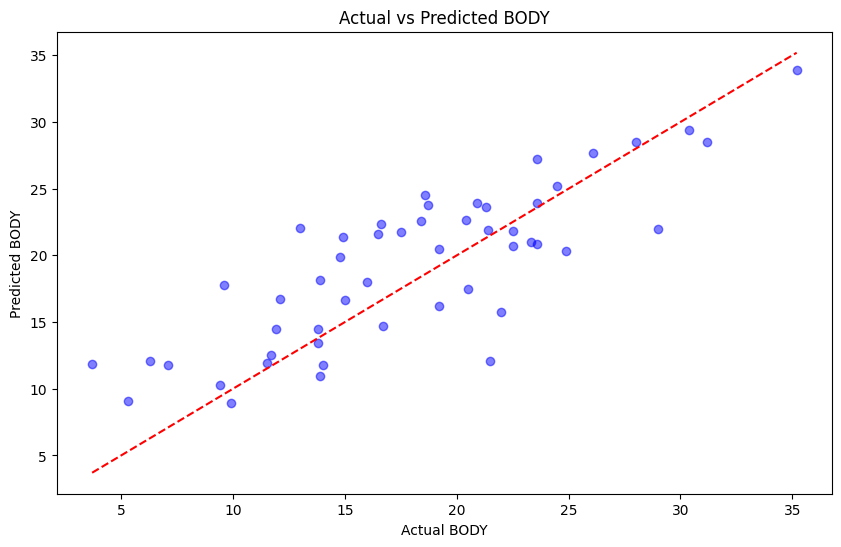

In [ ]:
z_test_array = z_test.values.flatten()
print("z_test:", z_test_array)
print("pred_fat:", pred_fat)

# Check if the lengths of y_test_array and pred_density match
print("Length of z_test_array:", len(z_test_array))
print("Length of pred_fat:", len(pred_fat))

#compare predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(z_test_array, pred_fat, color='blue', alpha=0.5)
plt.plot([min(z_test_array), max(z_test_array)], [min(z_test_array), max(z_test_array)], color='red', linestyle='--')
plt.xlabel('Actual BODY')
plt.ylabel('Predicted BODY')
plt.title('Actual vs Predicted BODY')
plt.show()

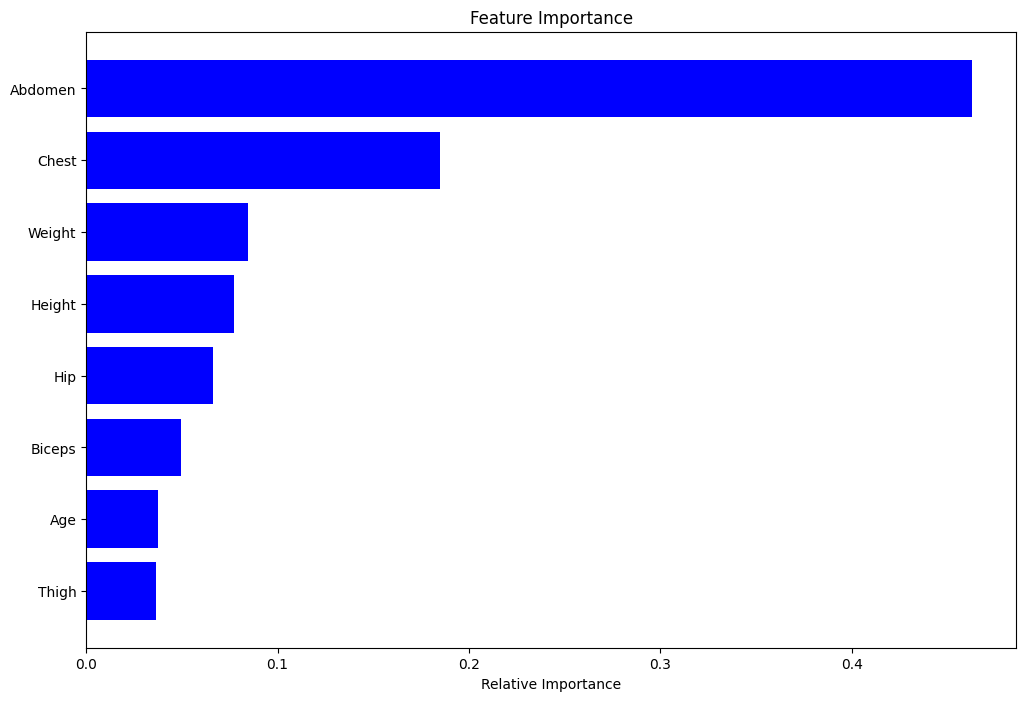

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,8))
plt.title('Feature Importance')
plt.barh(range(len(indices)),importances[indices], color='b', align = 'center')

plt.yticks(range(len(indices)), [feature_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section